# Problem set 2
General imports and setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba

In [2]:
plt.rcParams['figure.figsize'] = [18, 8]
plt.rcParams['font.size'] = 22

In [3]:
def simple_plot(states,state_label, x_grid,y_grid):
    """
    Simple Plotting function to avoid repetition of the same code
    """
    for i in range(len(states)):
        plt.plot(x_grid,y_grid[i,:],label=f'{state_label}={states[i]:.2f}')
    plt.legend()
    plt.show()

## Question 1

I start by importing the following functions I need for this question.

- Stationary function from markov_approx.py
- My fast rouwenhorst function from PS1
- A function that finds the stationary distribution using eigenvectors and eigenvalues

In [4]:
import stationary_functions as st

In [5]:
_,markov_pi,markov_Pi = st.fast_rouwenhorst(0.9,1,N=10)

print(markov_pi)


[0.00195313 0.01757813 0.0703125  0.1640625  0.24609375 0.24609375
 0.1640625  0.0703125  0.01757813 0.00195313]


In [6]:
eigenvalue_pi = st.stationary_via_eigenvalues(markov_Pi)
print(eigenvalue_pi)

[0.00195312 0.01757812 0.0703125  0.1640625  0.24609375 0.24609375
 0.1640625  0.0703125  0.01757813 0.00195313]


The results are very similar though there are differences at 8 decimal places so now I will check which is the most accurate in terms of not being trasformed by right multiplication by Pi

In [7]:
markov_pi@markov_Pi-markov_pi

array([-3.09386631e-13, -1.54693272e-12, -2.47508958e-12,  0.00000000e+00,
        4.33145186e-12,  4.33145186e-12,  0.00000000e+00, -2.47508958e-12,
       -1.54693272e-12, -3.09386631e-13])

In [8]:
eigenvalue_pi@markov_Pi-eigenvalue_pi

array([ 2.81892565e-18,  2.08166817e-17,  1.24900090e-16,  5.55111512e-17,
        2.77555756e-16, -1.38777878e-16, -1.11022302e-16, -6.93889390e-17,
       -2.08166817e-17, -1.30104261e-18])

In [9]:
print(np.sum(np.abs(markov_pi@markov_Pi-markov_pi)))
print(np.sum(np.abs(eigenvalue_pi@markov_Pi-eigenvalue_pi)))

1.7325721586580745e-11
8.229094489164979e-16


The method using eigenvalues gives a much more accurate answer. I can improve the accuracy of the iterative function by decreasing the tolerance

In [10]:
markov_pi_accurate = st.stationary(markov_Pi, tol=1E-16)
markov_pi_accurate@markov_Pi-markov_pi_accurate

array([-1.30104261e-18, -3.46944695e-18,  0.00000000e+00,  2.77555756e-17,
        5.55111512e-17,  5.55111512e-17,  2.77555756e-17,  1.38777878e-17,
       -3.46944695e-18, -8.67361738e-19])

In [11]:
#%timeit st.stationary_via_eigenvalues(markov_Pi)

48.2 µs ± 2.73 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

In [12]:
#%timeit st.stationary(markov_Pi)

38.7 µs ± 800 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)

In [13]:
#%timeit st.stationary(markov_Pi, tol=1E-15)

54.6 µs ± 413 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)

They are about the same speed for the case considered in the earlier questions. Now increasing the states

In [14]:
_,_,large_Pi1 = st.fast_rouwenhorst(0.9,1,N=100)
_,_,large_Pi2 = st.fast_rouwenhorst(0.99,1,N=100)
_,_,large_Pi3 = st.fast_rouwenhorst(0.999,1,N=100)

In [15]:
#%timeit st.stationary_via_eigenvalues(large_Pi1)
#%timeit st.stationary_via_eigenvalues(large_Pi2)
#%timeit st.stationary_via_eigenvalues(large_Pi3)

5.09 ms ± 271 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

7.23 ms ± 187 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

The final one throws up an error

In [16]:
#%timeit stationary(large_Pi1)
#%timeit stationary(large_Pi2)
#%timeit stationary(large_Pi3)

215 µs ± 6.28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

1.87 ms ± 12.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

29.3 ms ± 68.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

In [17]:
#%timeit stationary(large_Pi1, tol=1E-15)
#%timeit stationary(large_Pi2, tol=1E-15)
#%timeit stationary(large_Pi3, tol=1E-15, maxit = 100000)

278 µs ± 210 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)

2.64 ms ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

44.1 ms ± 266 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [18]:
markov_pi_large1 = st.stationary(large_Pi1, tol=1E-15)
eigenvalue_pi_large1 = st.stationary_via_eigenvalues(large_Pi1)

For the larger number of states the iterative algorithm is significantly faster though the benefit is reduced for $\rho=0.99$. For $\rho=0.999$ both the eigenvalue function and the iterative function with a lower tolerance failed to converge

In [19]:
np.sum(np.abs((markov_pi_large1@large_Pi1-markov_pi_large1)/markov_pi_large1))

1.8976684258108944e-11

In [20]:
np.sum(np.abs((eigenvalue_pi_large1@large_Pi1-eigenvalue_pi_large1)/eigenvalue_pi_large1))

13.27771539501695

The relative error of the eigenvalue approach is much larger. Given the decreased speed and accuracy of the eigenvalue procedure for large matrices. Therefore for the combined process I think the iterative process will be better

## Question 2

I import the functions I need for both question 2 and 3 from the same file as they use many similar functions

In [21]:
import ha_questions_func as ha

In [22]:
a_grid = ha.agrid(amin=0, amax=200, N=500)
y, pi, Pi = ha.fast_rouwenhorst_income(0.975,0.7,N=7)
# Confirming that the crossectional mean is 1
print(np.vdot(y,pi))

1.0


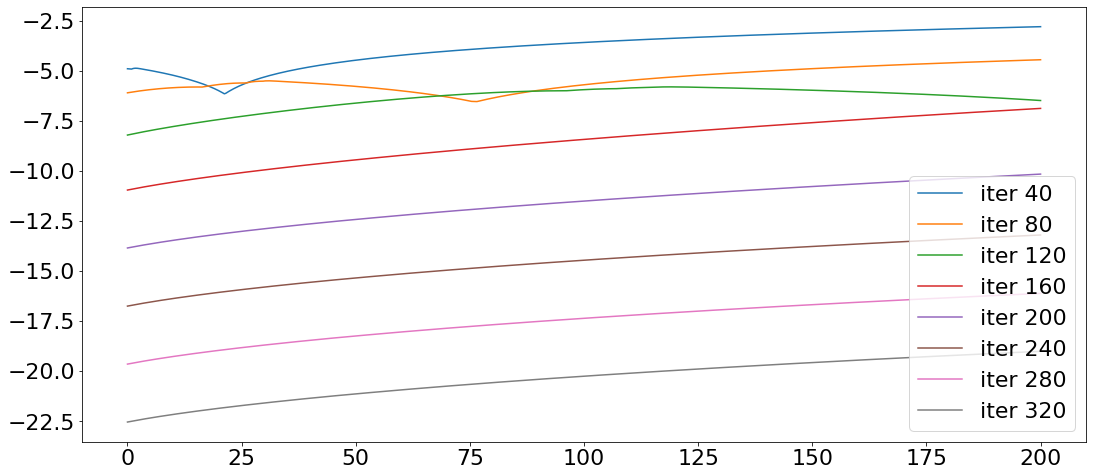

In [23]:
_, _ = ha.ss_policy_plot(lambda c: 1/c, lambda c:1/c,1-0.08/4,Pi,0.01/4,y,a_grid)

Slowest convergence is for high assets

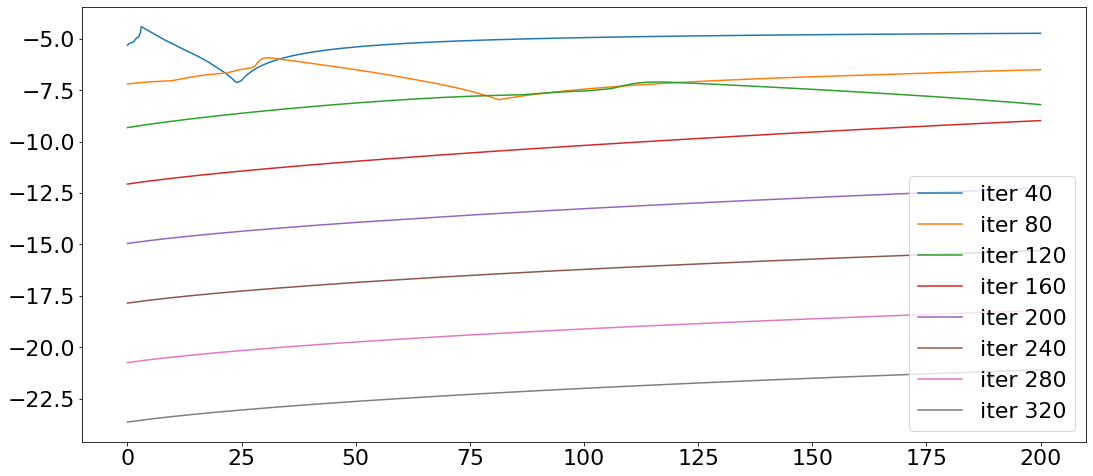

In [24]:
_, _ = ha.ss_policy_relativeplot(lambda c: 1/c, lambda c:1/c,1-0.08/4,Pi,0.01/4,y,a_grid)

## Question 3

In [25]:
a_grid = ha.agrid(amin=0, amax=200, N=100)
c_pol, a_pol = ha.ss_policy(lambda c: 1/c, lambda c:1/c,1-0.08/4,Pi,0.01/4,y,a_grid, tol = 1E-9)

In [26]:
errors_linear = ha.euler_equation_errors(c_pol,a_pol,lambda c:1/c,1-0.08/4,Pi,0.01/4,y,a_grid)

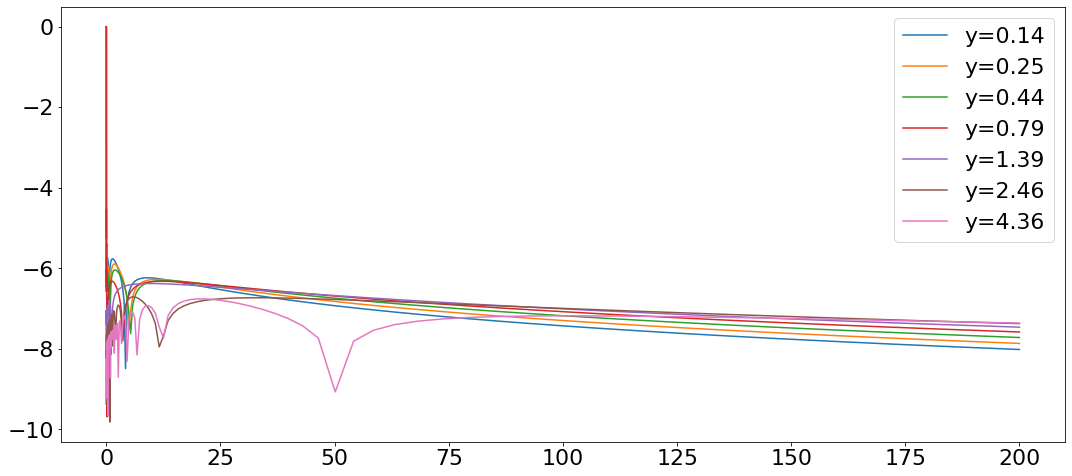

In [27]:
simple_plot(y,'y', a_grid,errors_linear)

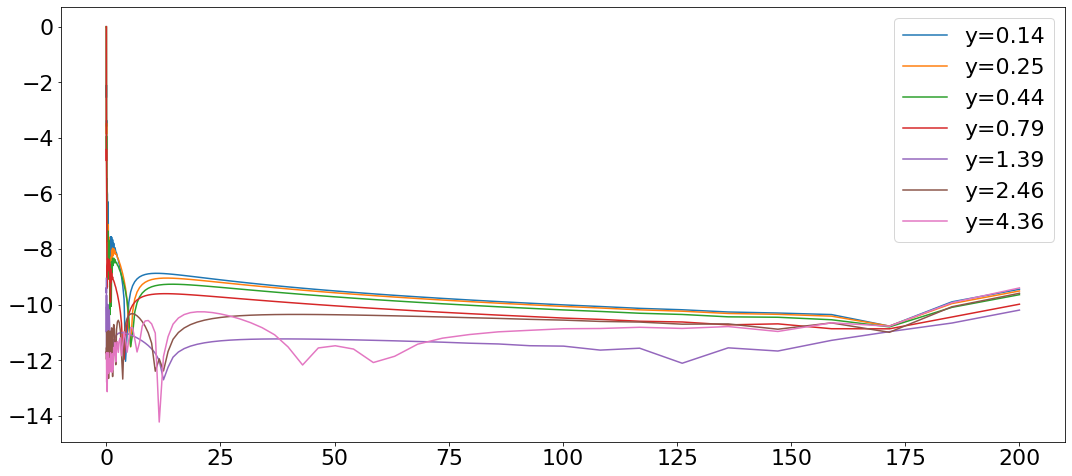

In [28]:
c_cubic, a_cubic = ha.ss_policy_cubic(lambda c: 1/c, lambda c:1/c,1-0.08/4,Pi,0.01/4,y,a_grid, tol = 1E-9)
errors_cubic = ha.euler_equation_errors_cubic(c_cubic,a_cubic,lambda c:1/c,1-0.08/4,Pi,0.01/4,y,a_grid)

simple_plot(y,'y', a_grid,errors_cubic)

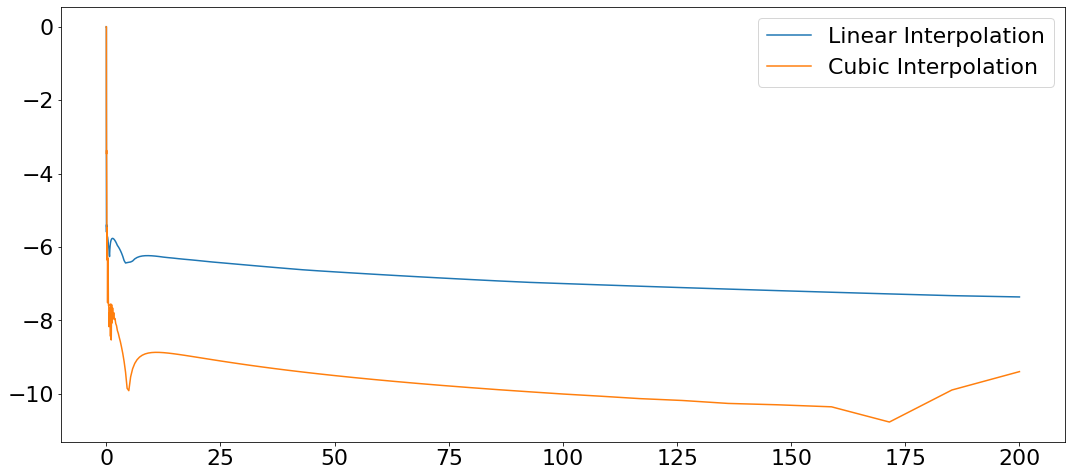

In [29]:
plt.plot(a_grid,np.max(errors_linear,axis=0),label='Linear Interpolation')
plt.plot(a_grid,np.max(errors_cubic,axis=0), Label = 'Cubic Interpolation')
plt.legend()
plt.show()

In [30]:
index_of_1 = np.argmin(np.abs(a_grid-1))

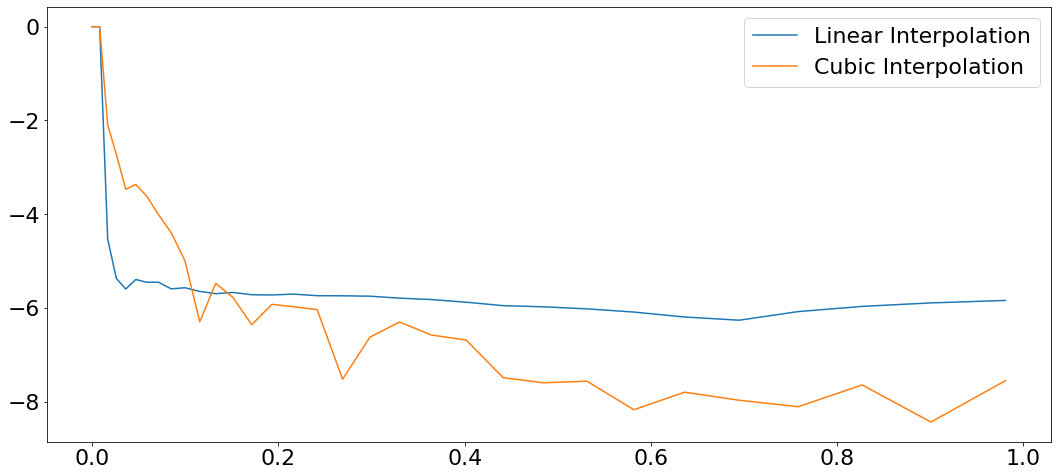

In [31]:
plt.plot(a_grid[:index_of_1+1],np.max(errors_linear[:,:index_of_1+1],axis=0),label='Linear Interpolation')
plt.plot(a_grid[:index_of_1+1],np.max(errors_cubic[:,:index_of_1+1],axis=0), Label = 'Cubic Interpolation')
plt.legend()
plt.show()

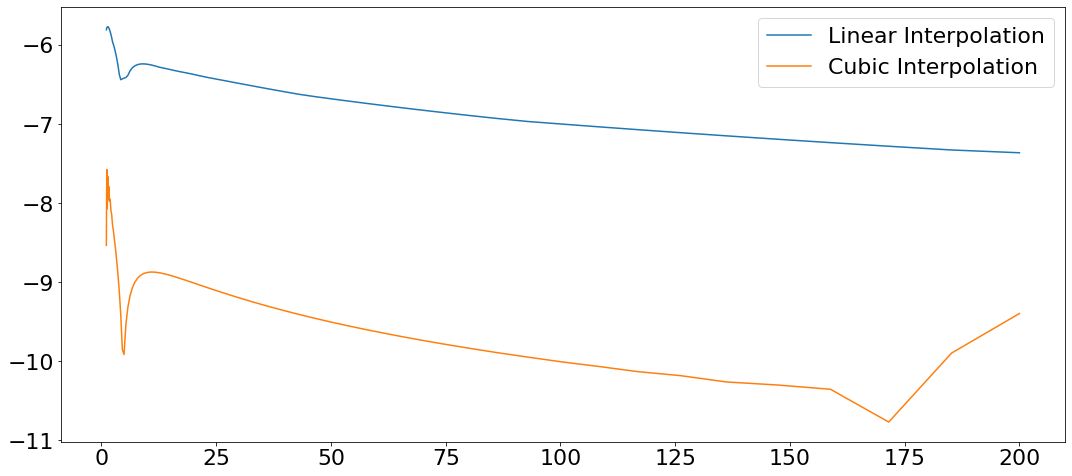

In [32]:
plt.plot(a_grid[index_of_1+1:],np.max(errors_linear[:,index_of_1+1:],axis=0),label='Linear Interpolation')
plt.plot(a_grid[index_of_1+1:],np.max(errors_cubic[:,index_of_1+1:],axis=0), Label = 'Cubic Interpolation')
plt.legend()
plt.show()

In [33]:
a_grid = ha.agrid(amin=0, amax=200, N=1000)
c_pol, a_pol = ha.ss_policy(lambda c: 1/c, lambda c:1/c,1-0.08/4,Pi,0.01/4,y,a_grid, tol = 1E-9)
errors_linear = ha.euler_equation_errors(c_pol,a_pol,lambda c:1/c,1-0.08/4,Pi,0.01/4,y,a_grid)


In [34]:
c_cubic, a_cubic = ha.ss_policy_cubic(lambda c: 1/c, lambda c:1/c,1-0.08/4,Pi,0.01/4,y,a_grid, tol = 1E-9)
errors_cubic = ha.euler_equation_errors_cubic(c_cubic,a_cubic,lambda c:1/c,1-0.08/4,Pi,0.01/4,y,a_grid)

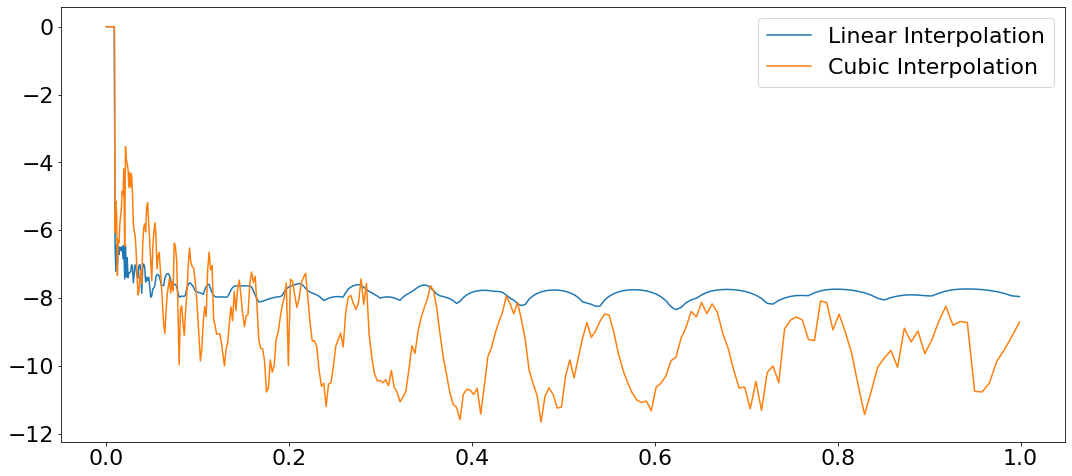

In [35]:
index_of_1 = np.argmin(np.abs(a_grid-1))
plt.plot(a_grid[:index_of_1+1],np.max(errors_linear[:,:index_of_1+1],axis=0),label='Linear Interpolation')
plt.plot(a_grid[:index_of_1+1],np.max(errors_cubic[:,:index_of_1+1],axis=0), Label = 'Cubic Interpolation')
plt.legend()
plt.show()

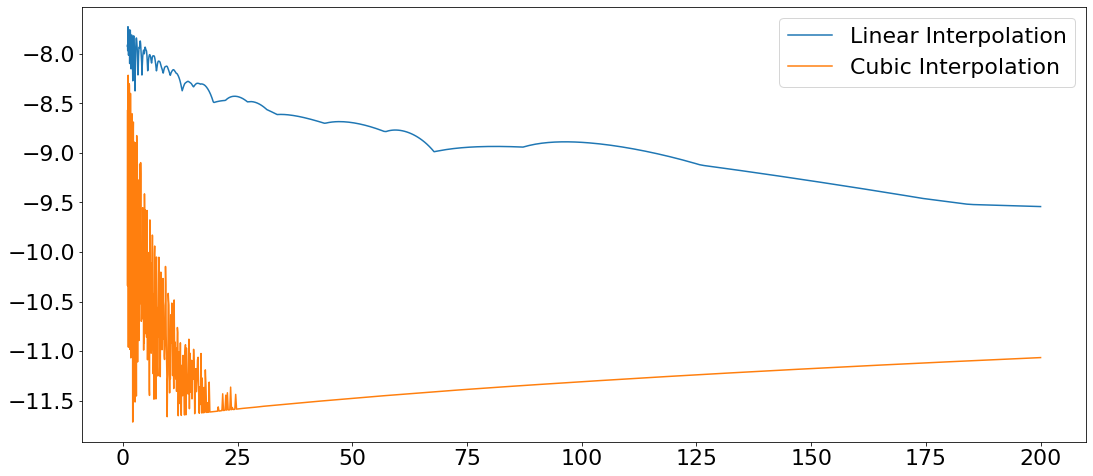

In [36]:
plt.plot(a_grid[index_of_1+1:],np.max(errors_linear[:,index_of_1+1:],axis=0),label='Linear Interpolation')
plt.plot(a_grid[index_of_1+1:],np.max(errors_cubic[:,index_of_1+1:],axis=0), Label = 'Cubic Interpolation')
plt.legend()
plt.show()

## Question 4

First I import the functions I wrote to solve this question and then I discuss the build up to solving the problem

In [37]:
import firm_problem as fp
import numpy.polynomial.chebyshev as chebyshev

The FOC and envelope of the firm problem are

$$
\begin{align}
1 +\Phi(k_+-k) &=   \beta \mathbb{E}[V_k(z_+,k_+)]\\
V_k(z,k)&=z\alpha k^{\alpha-1}+(1-\delta) + \Phi(k_+-k)
\end{align}
$$

Thus the Euler equation is 

$$
1 +\Phi(k_+-k)= \beta \mathbb{E}[z_+\alpha k_+^{\alpha-1}+(1-\delta) + \Phi(k_{++}-k_+)]
$$

Now to convert to endogenous grid points.

1. Fix a k_+ and z
2. The current policy function gives a k_++
3. Therefore the euler equation defines a k
4. Thus we have a mapping between z, k and k_+

In [38]:
log_z, pi, Pi = ha.fast_rouwenhorst_income(0.9,0.5,N=7)
#z = np.exp(log_z)
#z = 0.3*z/
#print(np.vdot(z,pi))
z = log_z*0.3


Note that k low and k high can be worked out explicity. In the case with no adjustment costs a firm with producitvity $z$ will set $ k=(\frac{\alpha z}{\delta})^{\frac{1}{1-\alpha}} $. There is no reason for the firms in this model to choose capital below this value for z at its lowest value and above this value when z is highest.

While this is nice in theory it doesn't quite work well in practise. It causes some small issues for klow as the grid should be a bit lower to make sure everything works nicely. The issue with the higher bound is the opposite, the firms don't get close as they expect to be a lower productivity in the future and so don't want to pay the adjustment costs to get to the flexible optimal level of capital.

In [80]:
#klow = (0.3*z[0]/0.05)**(1/(1-0.3))
#khigh =(0.3*z[-1]/0.05)**(1/(1-0.3))
klow=0.1
khigh  =3
N = 100
k_grid = np.linspace(klow,khigh,num=N,endpoint= True)

In [81]:
print(klow)

0.1


In [82]:
%time kplus = fp.ss_policy_linear(0.3,0.95,0.05,2,Pi,z,klow,khigh,N)

convergence in 81 iterations!
Wall time: 9.01 ms


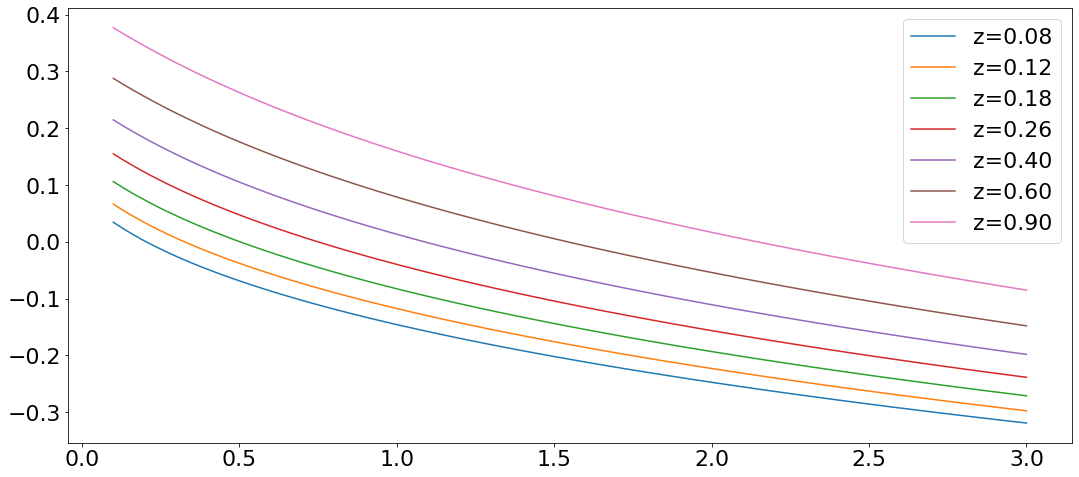

In [83]:
simple_plot(z,'z', k_grid,kplus-k_grid)


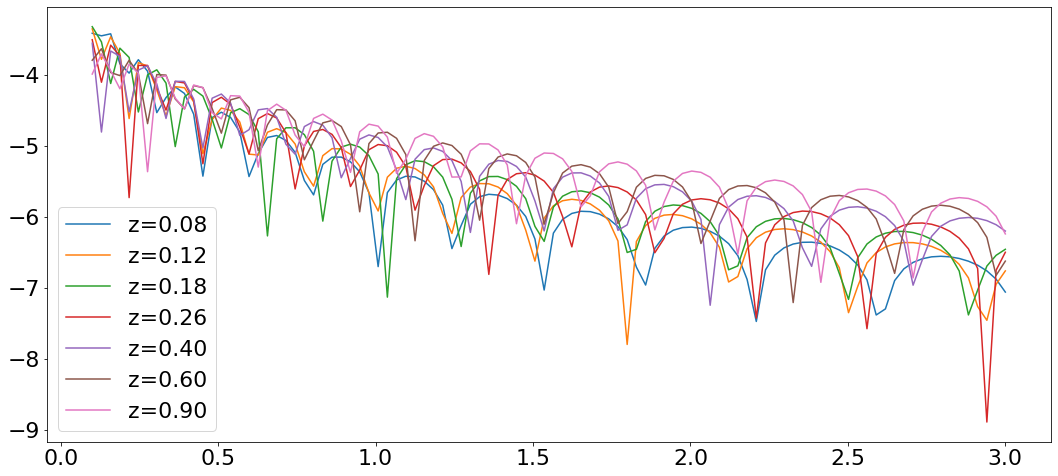

In [84]:
errors = fp.euler_equation_errors(kplus,0.3,0.95,0.05,2,Pi,z,klow,khigh,N)
simple_plot(z,'z',k_grid,errors)

In [85]:
k_dense = np.linspace(klow,khigh,num=1000,endpoint= True)
kplus_dense = np.empty((len(z),len(k_dense)))
kplus_i = np.empty(kplus_dense.shape, dtype=np.int64)
kplus_pi = np.empty(kplus_dense.shape)
for i in range(len(z)): 
    kplus_dense[i,:] = np.interp(k_dense,k_grid,kplus[i,:])
    kplus_i[i,:], kplus_pi[i,:] = fp.interpolate_coord(k_dense,kplus_dense[i,:])

In [86]:
ergodic_dist = fp.ergodic_dist(Pi, kplus_i, kplus_pi)

Convergence after 120 forward iterations!


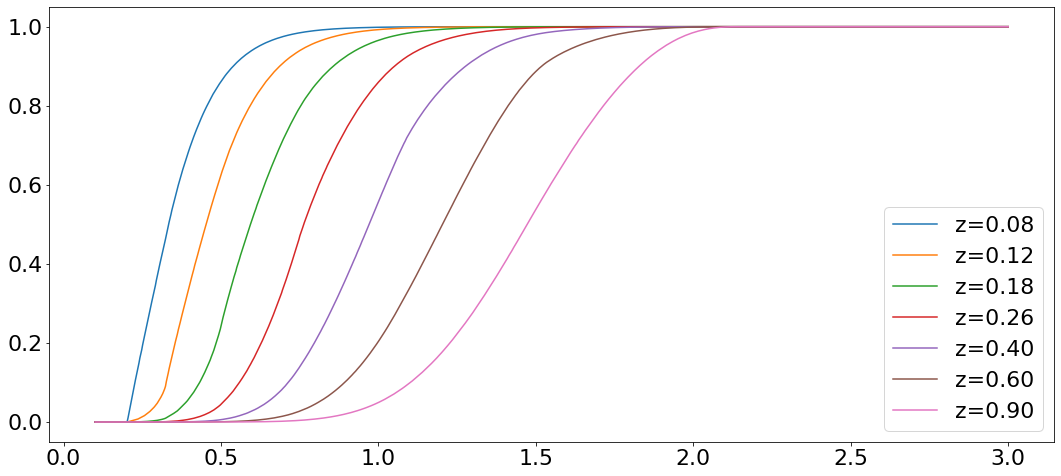

In [87]:
simple_plot(z,'z',k_dense,ergodic_dist.cumsum(axis=1)/pi[:,np.newaxis])

In [98]:
%time kplus_cheb = fp.ss_policy_chebyshev(0.3,0.95,0.05,2,Pi,z,klow,khigh,15)

convergence in 91 iterations!
Wall time: 118 ms


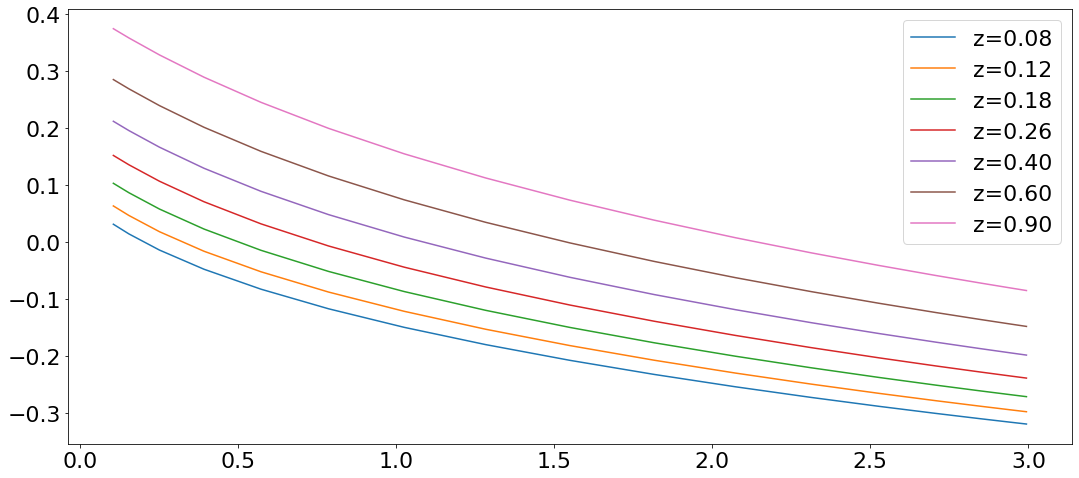

In [102]:
cheb_grid = fp.chebyshev_nodes(klow, khigh, 15)

simple_plot(z,'z', cheb_grid,kplus_cheb-cheb_grid)

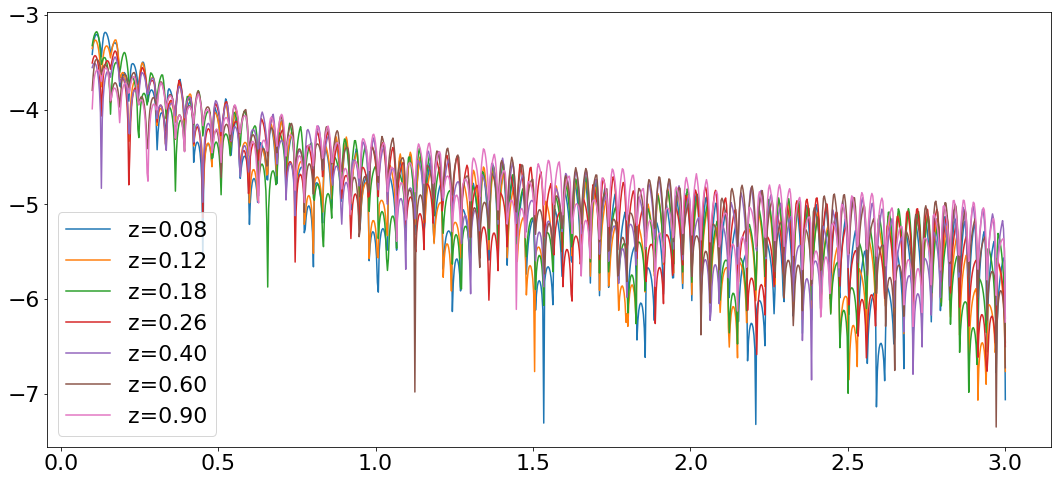

In [103]:
k_dense = np.linspace(klow,khigh,num=1000)
errors = fp.euler_equation_errors_linear(kplus,0.3,0.95,0.05,2,Pi,z,k_dense,klow,khigh,N)
simple_plot(z,'z',k_dense,errors)

[[0.13410971 0.1359306  0.13776012 ... 2.67543223 2.67815282 2.68087354]
 [0.16614159 0.16798874 0.16984311 ... 2.69702214 2.69973592 2.70244983]
 [0.20582258 0.20769121 0.20956588 ... 2.72345647 2.7261617  2.72886706]
 ...
 [0.31454541 0.31644545 0.31834966 ... 2.79639477 2.79907612 2.80175763]
 [0.38771965 0.38962927 0.39154236 ... 2.8466921  2.84935723 2.85202253]
 [0.47697636 0.47889234 0.4808112  ... 2.90964563 2.912291   2.91493656]]


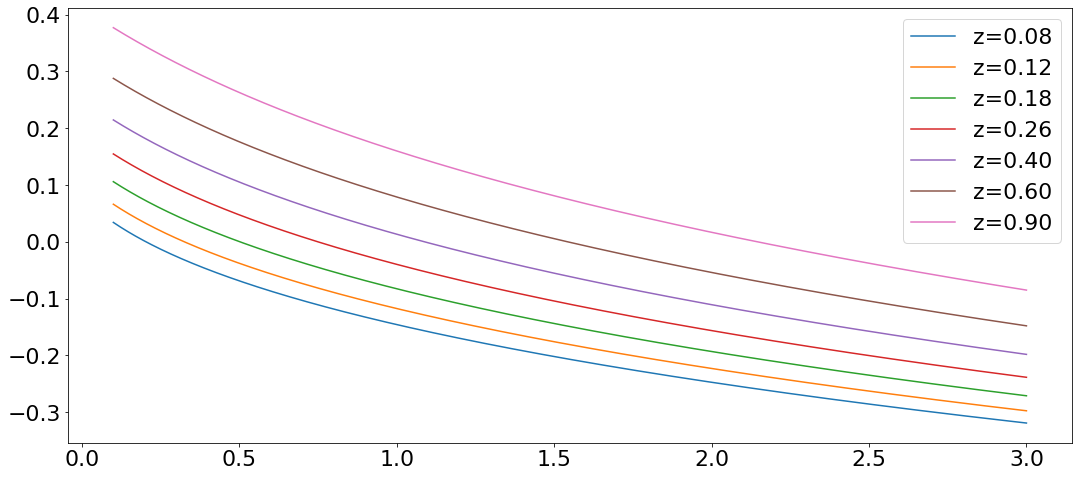

In [104]:
q = fp.chebyshev_interp(cheb_grid,kplus_cheb.T)

kplus_dense = chebyshev.chebval(k_dense,q)
print(kplus_dense)
simple_plot(z,'z', k_dense,kplus_dense-k_dense)

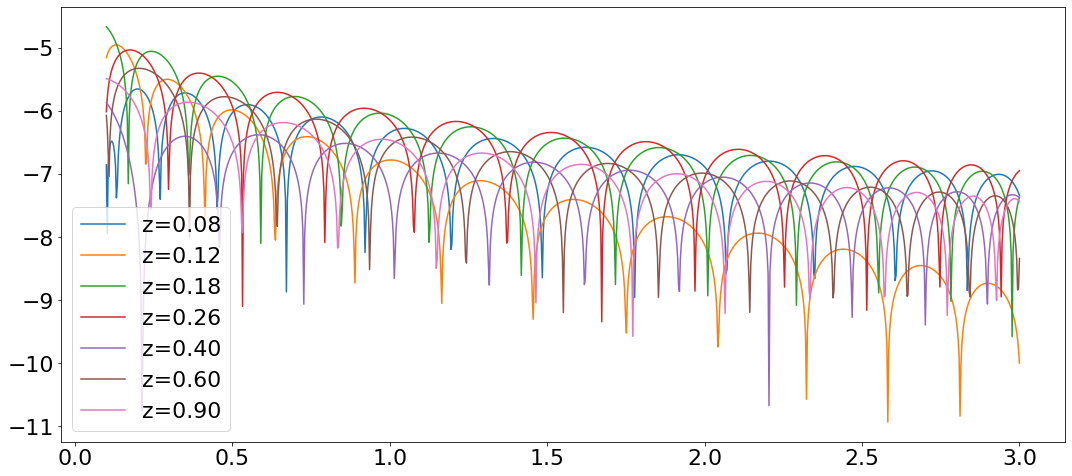

In [105]:
chebyshev_errors = fp.ee_error_chebyshev(q, k_dense,0.3,0.95,0.05,2,Pi,z)
simple_plot(z,'z', k_dense,chebyshev_errors)